In [ ]:
!pip install tensorflow matplotlib

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.3363 - loss: 1.7818 - val_accuracy: 0.5209 - val_loss: 1.3376
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.5701 - loss: 1.2152 - val_accuracy: 0.6132 - val_loss: 1.0948
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.6306 - loss: 1.0455 - val_accuracy: 0.6557 - val_loss: 0.9766
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.6682 - loss: 0.9397 - val_accuracy: 0.6579 - val_loss: 0.9807
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.6951 - loss: 0.8678 - val_accuracy: 0.6529 - val_loss: 0.9774
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.7153 - loss: 0.8118 - val_accuracy: 0.6834 - val_loss: 0.9133
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.7334 - loss: 0.7548 - val_accuracy: 0.6965 - val_loss: 0.8917
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7444 -

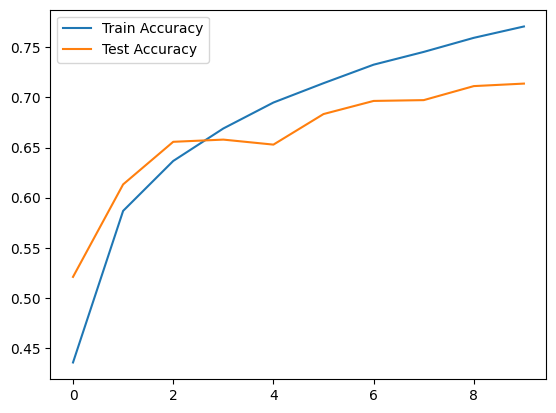

313/313 - 4s - 11ms/step - accuracy: 0.7138 - loss: 0.8584


Test Accuracy: 71.38%
Model saved!


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

class_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Save model
model.save("cifar10_model.h5")
print("Model saved!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted Class: Cat


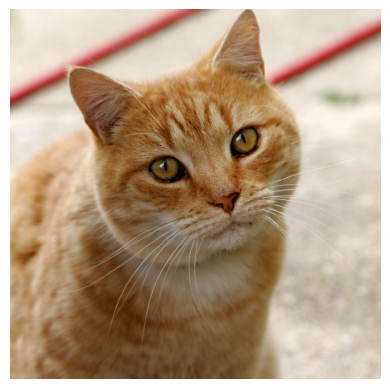

In [ ]:
from tensorflow.keras.preprocessing import image

img_path = '/content/Cat.jpg'

# Image preprocess
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(img_array)
class_index = np.argmax(predictions)

classes = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
print("Predicted Class:", classes[class_index])

# Show image
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()
